# Chapter 3 A tour of Machine Learning Classifiers Using SciKit-Learn

We will learn about various algorithms used in academia and in industry, the strengths and weaknesses of them, and learn about the differences between some supervised learning algorithms for classification. 

We will cover:

* Introduction to robust and populat classification algorithms such as logistic regression, support vector machines, decision trees, and k-nearest neighbors.
* Examples and explainations using the sciklit-learn ML library which provides a wide variety of ML algorithms via a user friendly Python API
* Discussions about strengths and weaknesses of classifiers with linear and non-linear decision boundaries

### Choosing a classification Algorithm

The are no free lunches, each algorithm has it's own strengths and weaknesses and no single algorithm is the best to use for any specific task, choosing the best algorithm for a specific task takes time and practice. It is always best to compare many different algorithms to select the best algorith for a given task. Factors affecting which algorithm will perform best include the number of features or examples in the dataset, the noise in the dataset, and whether the classes are linearly seperable. Both computational and predictive performance of any algorithm eventually depends on the underlying data available for training. The 5 main steps when training an algorithm are as follows:

1. Selecting features and collecting labeled training examples
2. Choosing a performance metric
3. Choosing a learning algorithm and training model
4. Evaluating performance of the model
5. Changing the settings and tuning the algorithm

### First steps with SciKit-Learn - training a perceptron

In Chapter 2 we impletemented a perceptron using raw Python but scikit-learn provides a class ready made for perceptrons (and Adaline models), as well as user friendly data preprocessing functions and options and options for fine tuning models which we will look at in Chapters 4&5

We will train again using the Iris dataset which is available from the SciKit-Learn module itself. We assign the 2 features we will look at to the feature matrix X and the labels of which flower class the examples belong to to array vector y.

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class Labels:', np.unique(y))

Class Labels: [0 1 2]


The class labels are already encoded as integers which is a common convention, it benefits computainal performance over string labels due to a smaller memory footprint. Again, to evaluate the model's performance we split the data into training and test datasets. In chapter 6 we discuss best practices for evaluating model performance and hyper parameter tuning. We can use the SciKit-Learn function train_test_split function to split the dataset.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# The dataset is randomly shuffled prior to splitting and providing a random_state seed to the pseudo random number generator used by the function ensures results are reproducible.
# The stratify=y kwarg ensures the function returns a split where the test and training subsets of data have the same proportion of each class label
# We can verify using numpy's bincount function which counts occurances of a value in an array

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Just as in chapter 2 we will standardize our features, this time we can use sklearns StandardScaler function

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

We initialized a StandardScaler object which we then used to estimate the feature means and standard deviations from the training dataset, then using the transform method the sc object uses these means and deviations to standardize the training and test datasets. We use the means and deviations from the training dataset to transform the test dataset as well so that both standardized subsets are comparable to each other.

We can now fit a perceptron model from sklearn, note most algorithms in sklearn already support multi-class classification problems via the One Vs All approach.

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1) #random_state ensure reproducibility of initial shuffling after each epoch
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
# We can now make predictions via the predict method
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [8]:
#sklearn implements many different ways to calculate the accuracy of a model
from sklearn.metrics import accuracy_score
print(f'Accuracy score: {accuracy_score(y_test, y_pred):.3f}')

Accuracy score: 0.978


In [9]:
# Alternatively, every classifier in sklearn has a score method which combines the the predict call with the accuracy scrore function

print(f'Accuracy score: {ppn.score(X_test_std, y_test):.3f}')

Accuracy score: 0.978


##### Overfitting

Note we evaluate performance based on the test dataset, in Chapter 6 we will learn useful techniques for, including graphical analysis, such as learning curves, to detect and prevent over fitting which is where the model picks up the patterns in the training dataset well but fails to generalise well to the test dataset.

('red', 'blue', 'lightgreen')
-2.555787268814562 2.734790447233992 

-2.438387213510368 2.708084816043562 



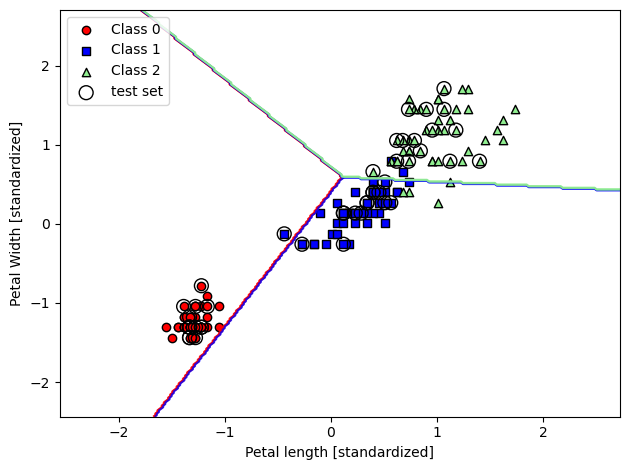

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None,
    resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])   
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

def plot_decision_boundary_regions(X, y, classifier, resolution=0.02, test_idx = None):
    # setp marker generator and colour map
    markers = ('o', 's', '^', 'v', '<')
    colours = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colours[:len(np.unique(y))])
    print(colours[:len(np.unique(y))])

    #plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(x1_min, x1_max,'\n')
    print(x2_min, x2_max,'\n')
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contour(xx1, xx2, lab, alpha=0.8, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for i, cl, in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],alpha=1, color=colours[i], marker=markers[i], label = f'Class {cl}', edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_boundary_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The 3 flower classes can't be linearly seperated, however, remember the perceptron will never converge on a dataset that aren't perfectly linearly seperable. This is why the perceptron is not recommended in practice. We will look in the following sections at more powerful linear classifiers which will converge on a loss minimum even is the dataset is not perfectly linearly seperable.

### Modeling class probabilities via logistic regression

Since there will always be misclassifications when using the perceptron rule, the weights will continuously be updated in every epoch. We now look at logisitic regression for linear and binary classification which despite its name is a classification alogorithm and not a regression algorithm.

### Logistic regression and conditional probabilities

One of the most widely used binary classification algorithms in industry and performs well on linearly seperable classes. It ca be generalised to multi-class problems with a technique called multinomial logistic regression or softmax regression. You can also use the OvA approach to generalise logistic regression to multi-class problems

To explain logistic regression as a probabilistic model for binary classfication we introduce the conept of odds: the odds in favour of a particular event. the odds can be written as $\frac{p}{1-p}$ where p stands for the probability of the positive event. Positive event does not mean "good" it means the event we want to predict, eg the patient has a certain disease given certain symptoms. We can define the probability p as $p := p(y = 1|x)$, the conditional probability that a particular example belongs to calss 1 given features x. We further define the logit function which is the logarithm of the probability: $logit(p) = log(\frac{p}{1-p})$, where log is the natural logarithm.

Under the logistic model we assume there is a linear relationship between the weighted inputs (net inputs in C2), and the log odds

$$
logit(p) = w_1 x_1 + ... + w_m x_m + b = \sum_{i=j} w_j x_j + b = \bf{w}^T\bf{x} + b
$$

This describes the assumption we make abut the linear relationship between the log-odds and the net inputs but we are actually interested in the probabilty p. The inverse of the logit function is typically called the logistic sigmoid function, or sigmoid function:

$$
\sigma(z) = \frac{1}{1-e^{-z}}
$$

Here, $z$ s the net input, the linear combination of weights and the inputs (that is features associated with the training examples):

$$
z = \bf{W}^T \bf{x} +b
$$
Lets plot the sigmoid function in the range -7 to 7 to see how it looks

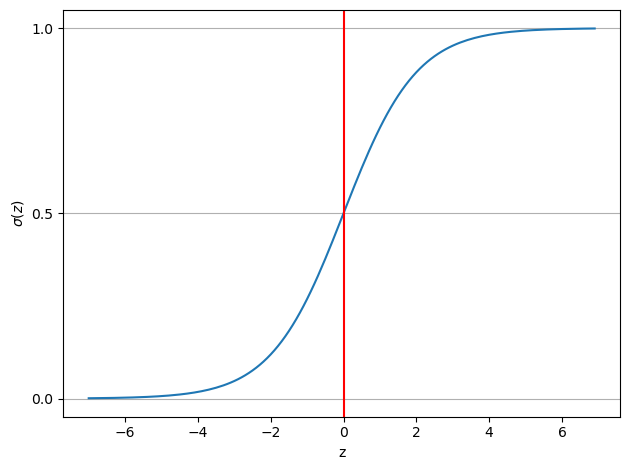

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='red')
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

$\sigma(z)$ tends to 1 as z tends to $\infty$ and 0 as z tends to $-\infty$, thus $sigma(z)$ takes real-number vaues as input and transforms them into  values in the range [0, 1] with an intercept $\sigma(0) = 0.5$. To understand the logistic regression model better we relate it to the Adaline model where the only difference is the sigmoid activation function versus the linear activation function used in the Adaline model. The output of the sigmoid function is therefore the probability that the given example belongs to a class, given its features x and parameterized by the weights and bias terms w and b.

The predicted probability can then be converted into a binary outcome via a threshold function:

$$
\hat y = \begin{cases}
        1 & if\ \sigma(z) >= 0.5 \\
        0 & otherwise
        \end{cases}
$$
Looking at the previous plot of the sigmoid function this is equivalent to


$$
\hat y = \begin{cases}
        1 & if\ z >= 0.0 \\
        0 & otherwise
        \end{cases}
$$
There are many applications where we are not just interested in the class given after applying the threshold function but also the probability prior to the threshold function, eg weather forcasting uses this to predict will it rain on a given day, but the output of the sigmoid function is used to give a probability that it will rain on the day, not just a will it won't it. Logistic regression is also used in a similar way in medicine where a model predicts if a patient has a disease given a set of symptoms, but also then the sigmoid output is used to assess confidence in that prediction.

### Learning the model weights via the logistic loss function

First we define the likelihood $\mathscr{L}$ that we want to maximize when we build the logistic regression model, assuming the individual examples in our dataset are independant of one another. The forula is

$$
\mathscr{L}(\bf{w}, b|\bf{x}) = p(y|\bf{x}; \bf{w},b) = \prod^{n}_{i=1} p(y^{(i)}|\bf{x^{(i)}}; \bf{w},b) = \prod^{n}_{i=1} \biggl(\sigma(z^{(i)})\biggr)^{y^{i}} \biggl( 1-\sigma(z^{(i)}) \biggr)^{1-y^{(i)}}
$$

The powers of $y^{(i)}$ and $1-y^{(i)}$ appear in order to kill the other term in the binary problem, ie when $y^{(i)} = 1$, the equation becomes the $p(y=1|\bf{x}; \bf{w},b)$ which by definition is equal to just the first multiplicative term, hence the power of 1-1 in this case kills the second multiplicative term. Its easier in practice to maximize the natural log of this equation called the log-likelihood:

$$
\mathscr{l}(\bf{w}, b|\bf{x}) = log\mathscr{L}(\bf{w}, b|\bf{x}) = \prod^{n}_{i=1} \left [y^{(i)}log \left ( \sigma(z^{(i)}) \right) + (1-y^{(i)})log \left (1 - \sigma(z^{(i)}) \right)\right]
$$
Applying the log reduces potential for numeric underflow, which is when the computer is trying to deal with values smaller than what can be represented by floating point values. Secondly, we can convert to product of factors into a summation of factors using the rules of logarithms making it easier to obtain the derivative of this function via the addition trick from calculus.

We could use gradient ascent to maximize this log-likelihood function. This works the same as gradient descent however in this case we want to maximize the likeilhood. Alternatively lets rewrite the log-likelihood function as a loss function that can be minimized using gradient descent as in chapter 2:

$$
L(\bf{w}, b) = \sum_{i=1}^{n}\left[-y^{(i)}log\left(\sigma(z^{(i)}) \right) - \left(1 - y^{(i)} \right)log\left(1 - \sigma(z^{(i)})\right) \right]
$$
To get a better grasp of this loss function, lets take a look at the loss that we calculate for single training example:

$$
L(\sigma(z), y; \bf{w}, b) = -ylog\left(\sigma(z) \right) - \left(1 - y \right)log\left(1 - \sigma(z) \right)
$$
If y = 0 then the first term dies, if y = 1 then the second term dies.

$$
L(\sigma(z), y; \bf{w}, b) = \begin{cases}
        -log\left(\sigma(z^{(i)}) \right) & if\ y = 1 \\
        -log\left(1 - \sigma(z^{(i)}) \right) & otherwise
        \end{cases}
$$
Lets write a short code snippet to create a plot that illustrates the loss of classifying a single training example for different values of $\sigma(z)$:

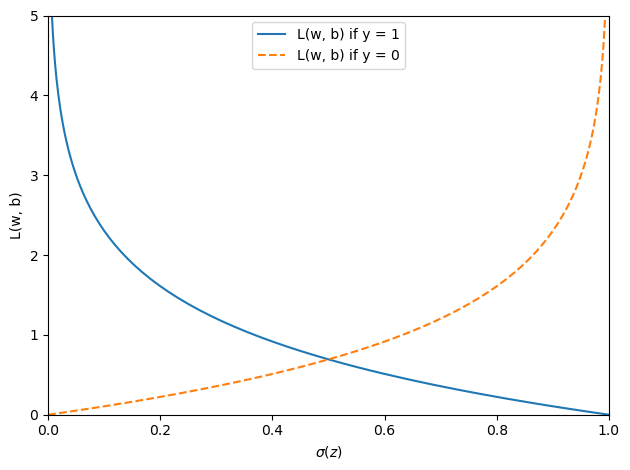

In [12]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigmoid_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigmoid_z, c1, label='L(w, b) if y = 1')
c0 = [loss_0(x) for x in z]
plt.plot(sigmoid_z, c0, label='L(w, b) if y = 0', linestyle='--')
plt.xlim([0, 1])
plt.ylim(0.0, 5.0)
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see the loss approaches 0 if we correctly predict the class is 1, similarly if we correctly predict an example belongs to class 0, the loss approaches 0 (dashed line). However, if we predict wrong we can see the loss tends to infinity, the main point is we penalize incorrect predictions.

### Converting an Adaline model implementation into an algorithm for logistic regression

In [13]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier

    Parameters
    ----------
    eta : float
        Learning rate, [0, 1]
    n_iter : int
        number of epochs to train over
    random_state : int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after training
    b_ : 1d-array
        Bias unit after training
    losses_ : list
        mean squared loss function values in each epoch
    """
    def __init__(self, eta = 0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors where n_examples is the number of examples and n_features is the number of features
        y : array-like, shape = n_examples
            Target values, true class labels
        
        Returns
        -------
        self : Instance of LogisticRegressionGD
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1])
        self.b_ = np.float(0.)
        self.losses = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2 * errors.mean()
            loss = (-y.dot(np.log(output))) / X.shape[0]
            self.losses.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        return 1. / (1 + np.exp(-np.clip(z, -250, 250) ) )
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

('red', 'blue')
-2.555787268814562 1.7308853813208733 

-2.438387213510368 1.7903638074236659 



C:\Users\Jonny\AppData\Local\Temp\ipykernel_12796\965736008.py:42: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


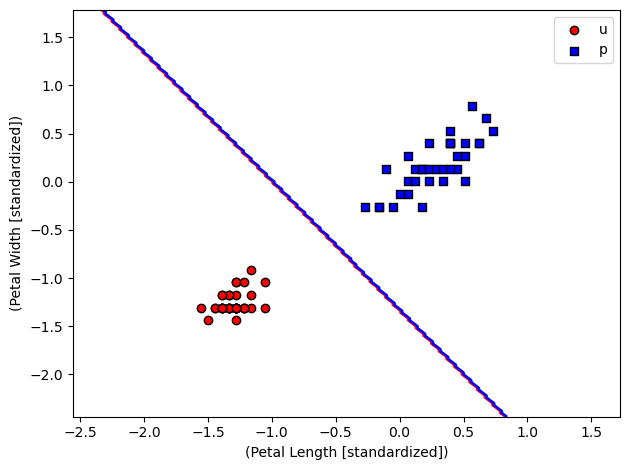

In [14]:
# This will only work for a binary classification problem so lets only consider 2 of the iris flower classes

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_boundary_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('(Petal Length [standardized])')
plt.ylabel('(Petal Width [standardized])')
plt.legend('upper left')
plt.tight_layout()
plt.show()

### Training a logistic regression model with cikit-learn

We will now use SciKit-Learns more optimized implementation of logistic regression which also support multi-class classification off the shelf. SciKit-Learn will choose a method for generalizing to multi-class automatically, either multinomial or OvA. In the following we set multi_class = 'OvA'. The default is mulitnomial which is the recommended approach for mutually exclusive class problems.

('red', 'blue', 'lightgreen')
-2.555787268814562 2.734790447233992 

-2.438387213510368 2.708084816043562 



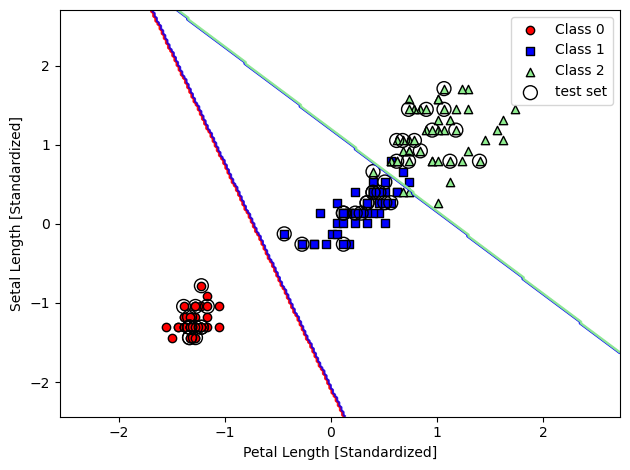

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100., solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_boundary_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('Petal Length [Standardized]')
plt.ylabel('Setal Length [Standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The mysterious parameter C will be explained in the next section on overfitting and regularization. The probability that examples belong to a certain class can be computed using the predict_proba method:

In [16]:
probs = lr.predict_proba(X_test_std[:3,:])
print(probs)

[[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]


In [17]:
print(probs.sum(axis=1))
# Use the argmax() method to retrieve the index of the highest value along the first axis which corresponds to the class label being predicted
print(probs.argmax(axis=1))

[1. 1. 1.]
[2 0 0]


In [18]:
# It is more convenient to call the predict method of the classifier class object directly:
print(lr.predict(X_test_std[:3, :]))

[2 0 0]


### Tackling overfitting via regularization

Overfitting is a common problem in ML where a model performs well on training datasets but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say it has high variance. It can be caused by having too many parameters, leading to a model that is too complex given the underlying data. A model can also be underfitted, meaning it is not complex enough to capture the patterns of the underlying data. Although we have only encounted linear models for classification so far, the problems are best illustrated by comparing a linear decision boundary to more complex nonlinear decision boundaries.

<p style="text-align: center;">
<img src="Figures\03_07.png" width="900" height="400">
</p>
<p style="text-align: center;"><b>Figure 3.8: Examples of underfitted, well-fitted and overfitted models</b></p>

One way to find a good bias-variance trade off is to tune the complexity of the model via regularization, a useful method for handling collinearity (high correlation among features), filtering out noise from the data and eventually preventing overfitting. The concept behind regularization is to introduce additional information to penalize extreme parameter (weight) values. The most common form of regularization is so-called L2 regularization (sometimes called L2 shrinkage or weight decay), which can be written as follows:

$$
\frac{\lambda}{2n}||\bf{w}|| = \frac{\lambda}{2n} \sum_{j=1}^{m}w_j^2
$$

Here, $\lambda$ is the regularization parameter, note the factor of 2 in denominator is merely a scaling factor, such that it cancels when computing loss gradient. The sample size n is also added to scale the regularization similar to the loss. Regularization is also another important reason to conduct feature scaling or standardization, if our features are not on similar scales, regularization will not work properly.

The logistic regression loss function can be regularized by adding a simple regularization term which will shrink the weights during model training:

$$
L(\bf{w}, b) = \sum_{i=1}^{n}\left[-y^{(i)}log\left(\sigma(z^{(i)}) \right) - \left(1 - y^{(i)} \right)log\left(1 - \sigma(z^{(i)})\right) \right] + \frac{\lambda}{2n}||\bf{w}||
$$
The partial derivative of the unregularized loss is defined as:

$$
\frac{\partial L(\bf{w},b)}{\partial w_j} = \left(\frac{1}{n}\sum_{i=1}^{n}\left(\sigma(\bf{w}^T\bf{x}^{(i)}) - y^{(i)} \right)x_j^{(i)} \right)
$$

Adding the regularization term changes the partial derivative to the following form:

$$
\frac{\partial L(\bf{w},b)}{\partial w_j} = \left(\frac{1}{n}\sum_{i=1}^{n}\left(\sigma(\bf{w}^T\bf{x}^{(i)}) - y^{(i)} \right)x_j^{(i)} \right) +\frac{\lambda}{n}w_j
$$

Via the regularization parameter $\lambda$ we can control how closely we fit the training data, while keeping the weights small. By increasing $\lambda$ we increase the regularization strength. Note the bias unit which is essentially an intercept term or negative threshold is not typically regularized.

The parameter C, that is implemented for the LogisticRegression class in SciKit-Learn comes from a convention in support vector machines, a tpoic in the following section. The term C is inversely proportional to the regularization parameter $\lambda$. Consequently, decreasing the value of the inverse regularization parameter, C, means that we are increasing the regularization strength, which we can visualise by plotting the L2 regularization path for the two weight coefficients: 

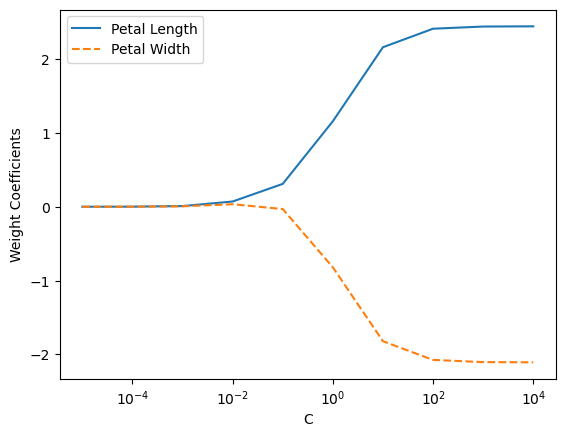

In [19]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal Length')
plt.plot(params, weights[:, 1], label='Petal Width', linestyle='--')
plt.ylabel('Weight Coefficients')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Maximum margin classifcation with support vector machines

Instead of minimizing the errors, we maximize the distance between the separating hyperplane decision boundary and our examples known as the margin.


<p style="text-align: center;">
<img src="Figures\03_10.png" width="900" height="400">
</p>
<p style="text-align: center;"><b>Figure 3.10: SVM maximizes the margin</b></p>

# Intuition

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error, whereas models with small margins are more prone to overfitting. 

# Non-linearly separable case using slack variables

The motivation for introducing the slack variable was that the linear constraints in the SVM optimization objective need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate loss penalization. The slack variable in turn introduces a variable C, considered a hyperparameter for controlling the penalty for misclassification. Large C values correspond to large error penalties, small C gives a smaller error penalty. We can then use C to control the width of the margin as illustrated in figure 3.11:

<p style="text-align: center;">
<img src="Figures\03_10.png" width="900" height="400">
</p>
<p style="text-align: center;"><b>Figure 3.11: Impact of large and small values for hyperparameter C</b></p>

This is related to regression regularization discussed previously. 

('red', 'blue', 'lightgreen')
-2.555787268814562 2.734790447233992 

-2.438387213510368 2.708084816043562 



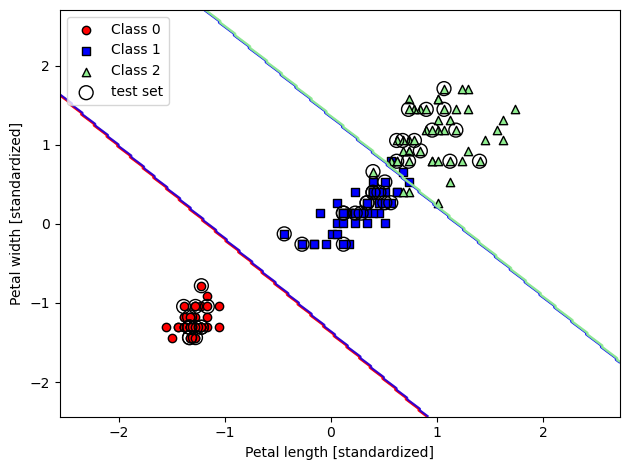

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_boundary_regions(X_combined_std,
y_combined,
classifier=svm,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Sklearns LogisticRegression and SVM classes use the highly optimized LIBLINEAR and LIBSVM libraries written in C/C++, however when datasets are too large to fit into memory sklearn offers alternative implementations via the SGDClassifier class, which also supports online learning via the partial_fit method. The concept is similar to stochatic gradient descent implemented in chapter to for the Adaline model:

In [21]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Solving non-linear problems with a kernal SVM

SVMs are used a lot in practice as they can be easily kernalized, lets create a dummy non-linearly separable dataset to help illustrate how this works

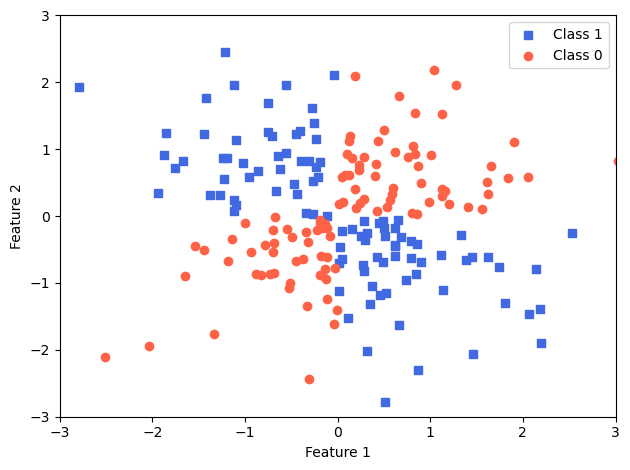

In [22]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
X_xor[y_xor == 1, 1],
c='royalblue', marker='s',
label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
X_xor[y_xor == 0, 1],
c='tomato', marker='o',
label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

we use a mapping function $\phi (x_1,x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)$ which allows for a linear hyperplane in the new space to be found, and then projected back onto the original space yielding a non-linear hyperplane:

<p style="text-align: center;">
<img src="Figures\03_13.png" width="900" height="800">
</p>
<p style="text-align: center;"><b>Figure 3.13: Kernal process</b></p>


# Using Kernal trick to find separating hyperplanes in a high-dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, 𝜙𝜙, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, 𝜙𝜙, to transform new, unseen data to classify it using the linear SVM model. Constructing the new features using the mapping function is computationally expensive which is where the kernal trick comes into play.

We don't go into detail on how to solve the quadratic programming task to train an SVM, in practice we just need to replace the fot product $x^{(i)T}x^{(j)}$ by $\phi \left(x^{(i)} \right)^T \phi \left(x^{(j)} \right)$. To save the expensive step of calculating the dot product between two points explicitly, we define a so called Kernal function:
$$
\kappa \left(x^{(i)}, x^{(j)} \right) = \phi \left(x^{(i)} \right)^T \phi \left(x^{(j)} \right)
$$

One of the most widely used is the radial basis function (RBF), which can simply be called the Gaussian kernal:

$$
\kappa \left(x^{(i)}, x^{(j)} \right) = exp\bigg(-\frac{||x^{(i)} - x^{(j)}||^2} {2 \sigma ^2} \bigg)
$$

Often simplified to

$$
\kappa \left(x^{(i)}, x^{(j)} \right) = exp\bigg(-\gamma||x^{(i)} - x^{(j)}||^2 \bigg)
$$

Here, $\gamma = \frac{1}{2\sigma^2}$ is a free parameter to be optimized. Roughly speaking, the term “kernel” can be interpreted as a similarity function between a pair of examples. The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples).

We use the SVC class from earlier, replacing the kernal function key word argument with "rbf":

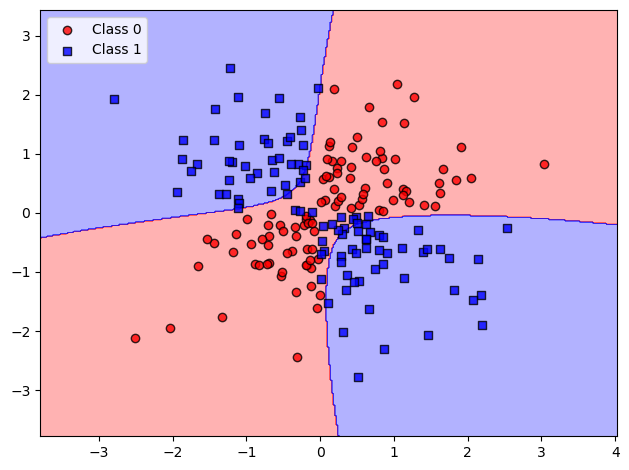

In [23]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


The $\gamma$ parameter which we set to 0.1 can be understood as a cut off parameter for the Gaussian sphere. Increasing $\gamma$ we increase the influence or reach of the training examples which leafs to a tighter and bumpier decision boundary. To get a better understanding we apply an RBF kernal SVM to the Iris flower dataset:

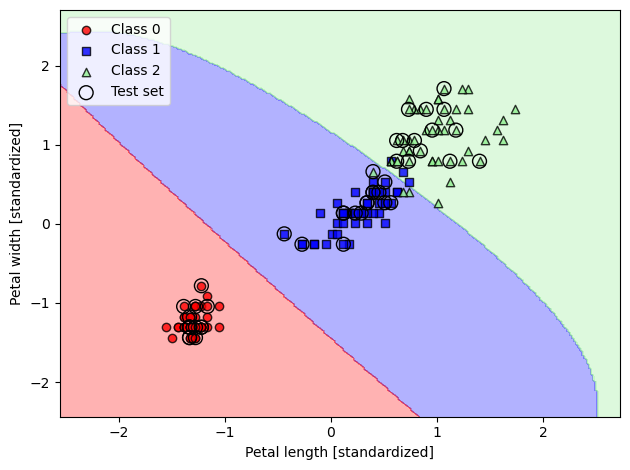

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

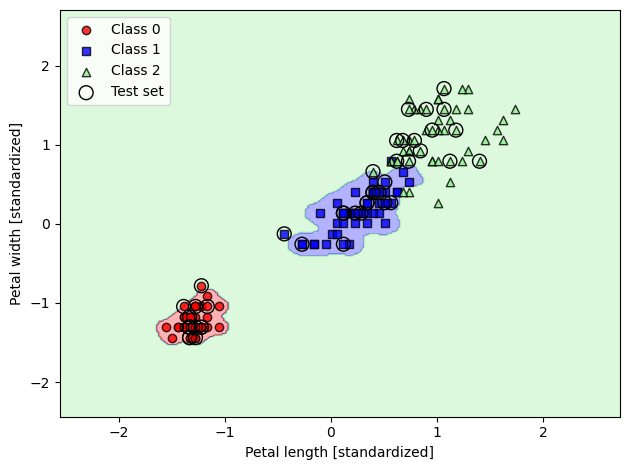

In [25]:
# increasing the value of gamma to observe the effect on the decision boundary

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

The training dataset is fit very well, but this model will not generaliise well to unseen data.

# Decision tree learning

Decision trees are very interpretable in terms of how they process a prediction, they look like a flow chart:

<p style="text-align: center;">
<img src="Figures\03_17.png" width="900" height="800">
</p>
<p style="text-align: center;"><b>Figure 3.18: Decision tree example</b></p>

Based on the features in the training dataset, the descision tree model learns a series of questions to infer the class labels of the examples. The tree splits the data at each node of the tree and determines the proportion of the split by trying to maximize the information gain (IG). In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximum depth of the tree.

# Maximizing IG

To split the nodes at the most informative features, we need to define an objective function to optimize via the tree learning algorithm. Here, our objective function is to maximize the IG at each split, which we define as follows:

$$
IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac{N_j}{N_p}I(D_j)
$$

Here, f is the feature to perform the split; Dp and Dj are the dataset of the parent and jth child node; I is our impurity measure; Np is the total number of training examples at the parent node; and Nj is the number of examples in the jth child node. As we can see, the information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities—the lower the impurities of the child nodes, the larger the information gain. However, for simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees. This means that each parent node is split into two child nodes, Dleft and Dright:

$$
IG(D_p,f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})
$$

The 3 commonly used impurity measures used in binary trees are Gini, Entropy and classification error, $I_G, I_H, I_E$

$$
I_H(t) = - \sum_{i=1}^c p(i|t)log_2 p(i|t)
$$

Here, p(i|t) is the proportion of the examples that belong to class i for a particular node, t. The entropy is therefore 0 if all examples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. For example, in a binary class setting, the entropy is 0 if p(i=1|t) = 1 or p(i=0|t) = 0. If the classes are distributed uniformly with p(i=1|t) = 0.5 and p(i=0|t) = 0.5, the entropy is 1. Therefore, we can say that the entropy criterion attempts to maximize the mutual information in the tree. To provide a visual intuition, let us visualize the entropy values for different class distributions via the following code:

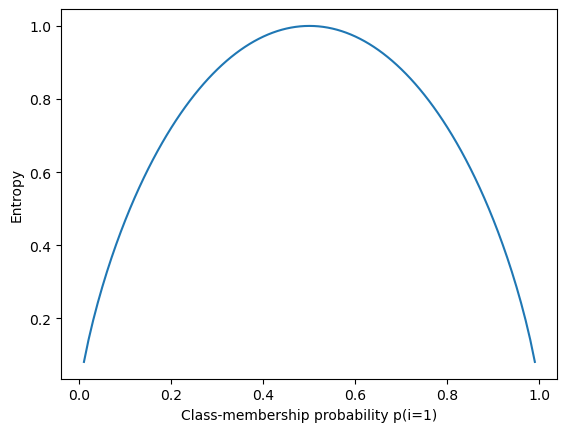

In [26]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

Gini impurity can be understood as a criterion to minimize the probability of classification

$$
I_G(t) = \sum^c_{i=1} p(i|t)(1-p(i|t)) = 1 - \sum^c_{i=1} p(i|t)^2
$$

Like entropty, it is maximized for perfectly mixed classes. They produce similar results and experimenting with pruning is usually better than experimenting with different impurity measures.

Classifcation error impurity measure:

$$
I_E(t) = 1 - max{p(i|t)}
$$

Useful for pruning but less sensitive to changes in the class probabilities of the nodes:

<p style="text-align: center;">
<img src="Figures\03_18.png" width="800" height="400">
</p>
<p style="text-align: center;"><b>Figure 3.20: Decision tree data splits</b></p>

Starting with $D_p$ at the parent consisting of 40 examples in class 1 and 40 in class 2 that we split into $D_{left}$ and $D_{right}$. $IG_E = 0.25$ for both examples, entropy criterion would also favour scenario B ($IG_H = 0.31$) over A ($IG_H = 0.19$) and so would Gini B ($IG_G = 0.1\bar{6}$), B ($IG_G = 0.125$). 

Plotting the 3 different criterion measures for class 1 probability in the range [0, 1]:

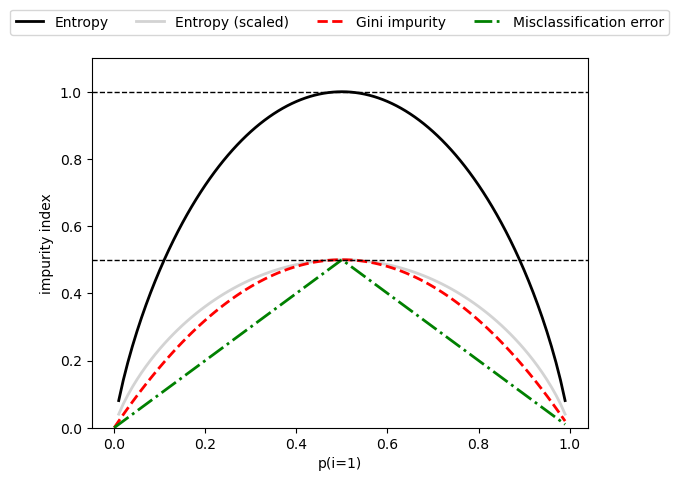

In [27]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)','Gini impurity','Misclassification error'],['-', '-', '--', '-.'],['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

# Building a decision tree

Deeper trees are more prone to overfitting

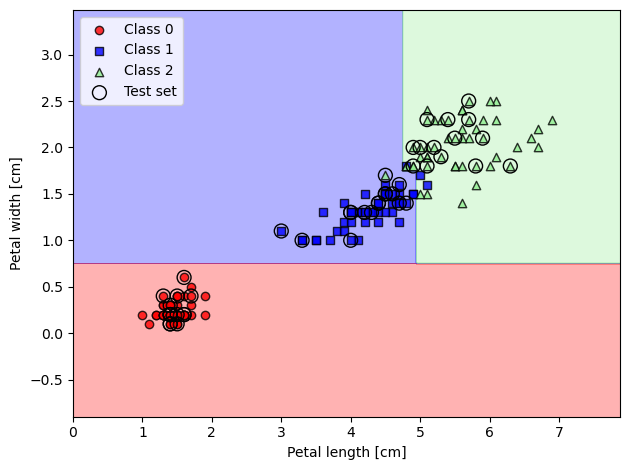

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
y_combined,
classifier=tree_model,
test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

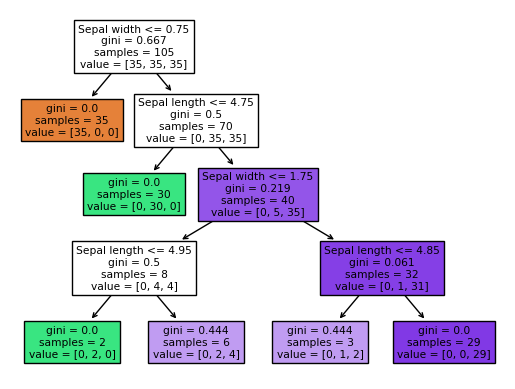

In [29]:
#Visualising the trained tree after fitting:

from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

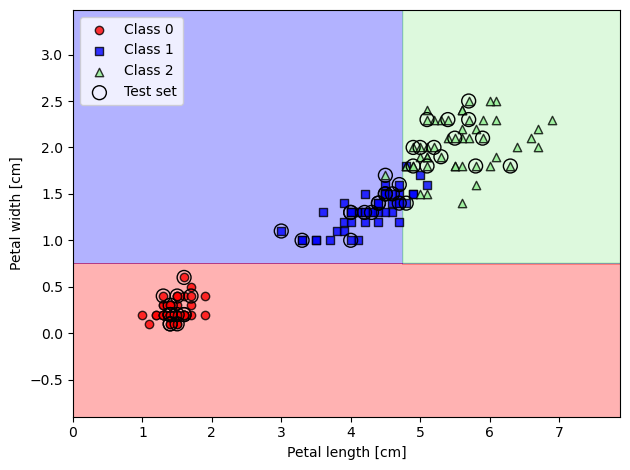

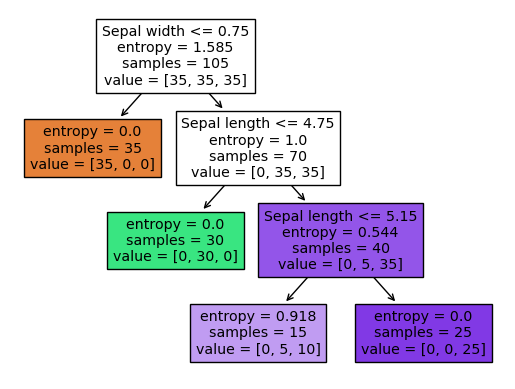

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
y_combined,
classifier=tree_model,
test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

# Random Forest Classifiers

Ensemble of decision trees all trained separately on a random subset of training examples selected with replacement and each node of each tree determined with a random set of the features, usualy $d = \sqrt{m}$ where d is the number of features chosen for each node out of m total features.

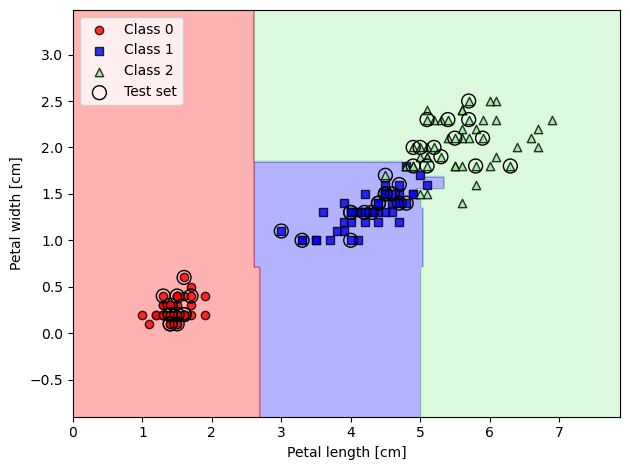

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K Nearest Neighbors

A so called lazy algorithm, a member of the instance based learning algorithms which is a sub set of non-parametric algorithms, meaning it does not learn a set of parameters which define a function which can be used to make future predictions without knowledge of the original training dataset, instead KNN works by:
1. Choose number k and a distance metric
2. find k-nearest neighbors based on the distance metric chosen to the data point we want to classify
3. assign the class label by majority vote of the neighbors found

<p style="text-align: center;">
<img src="Figures\03_23.png" width="400" height="400">
</p>
<p style="text-align: center;"><b>Figure 3.23: How KNN works</b></p>

c:\Users\Jonny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


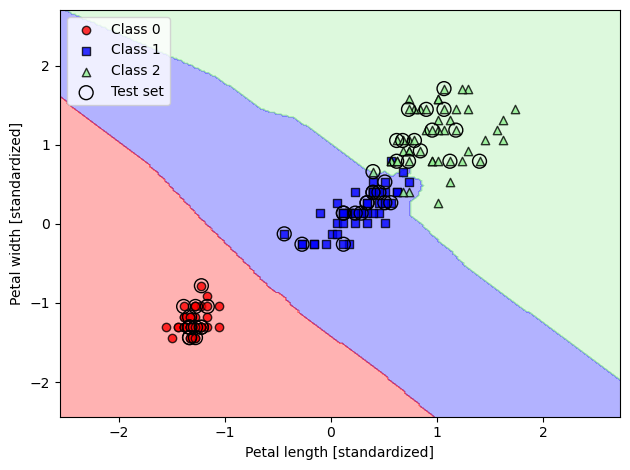

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Choice of k is crucial in finding balance between under and over fitting. Euclidean distance metric is usually good for real value examples like the flowers in the Iris dataset which are measured in cm. It is important to standardize though so each feature contributes equally. Minkowski distance used in previous code is just a generalization of Euclidean and Manhatten disctance:

$$
d(x^{(i)}, x^{(j)}) = \sqrt[p]{\sum_k |x_k^{(i)} - x_k^{(j)}|^P}
$$

which becomes Euclidean distance in event p=2, or Manhatten if p=1.